In [1]:
import tensorflow as tf
import keras
from keras import layers
from keras import Model
import numpy as np
import os
import tqdm
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
tf.__version__

'2.16.0-dev20240118'

In [2]:
class_ids = pd.read_csv('label_to_id.csv',sep = '\t')
class_ids['globalclass'] = class_ids['label_name'].apply(lambda x: x.split('/')[0])
class_ids['miniclass'] = class_ids['label_name'].apply(lambda x: x.split('/')[1])
class_ids

label_name  label_id  globalclass  \
0                 Скульптура/Исторический         0   Скульптура   
1                 ДПИ/Изделия из керамики         1          ДПИ   
2                   Живопись/Исторический         2     Живопись   
3                      Скульптура/Портрет         3   Скульптура   
4                      Живопись/Батальный         4     Живопись   
5                       Графика/Натюрморт         5      Графика   
6                             ДПИ/Роспись         6          ДПИ   
7                     Архитектура/Барокко         7  Архитектура   
8              Графика/Прикладная графика         8      Графика   
9                  Архитектура/Классицизм         9  Архитектура   
10                     Живопись/Натюрморт        10     Живопись   
11                        Живопись/Другое        11     Живопись   
12                             ДПИ/Другое        12          ДПИ   
13      Архитектура/Советская архитектура        13  Архитектура   
14    Живопись/Мифологический (сказочный)        14     Живопись   
15                         Графика/Пейзаж        15      Графика   
16                         ДПИ/Ткачество         16          ДПИ   
17          Архитектура/Авангард и модерн        17  Архитектура   
18  Архитектура/Древнерусская архитектура        18  Архитектура   
19                         Графика/Другое        19      Графика   
20            Скульптура/Анималистический        20   Скульптура   
21              Живопись/Анималистический        21     Живопись   
22                       Живопись/Бытовой        22     Живопись   
23                      Живопись/Авангард        23     Живопись   
24                         Графика/Плакат        24      Графика   
25                  ДПИ/Изделия из дерева        25          ДПИ   
26            Архитектура/Другое (арх-ра)        26  Архитектура   
27                        Живопись/Пейзаж        27     Живопись   
28                   Архитектура/Историзм        28  Архитектура   
29                      Скульптура/Другое        29   Скульптура   
30                           ДПИ/Мозаика         30          ДПИ   
31                       Живопись/Портрет        31     Живопись   
32                        Графика/Портрет        32      Графика   
33          Живопись/Религиозная живопись        33     Живопись   
34                Графика/Книжная графика        34      Графика   

                     miniclass  
0                 Исторический  
1          Изделия из керамики  
2                 Исторический  
3                      Портрет  
4                    Батальный  
5                    Натюрморт  
6                      Роспись  
7                      Барокко  
8           Прикладная графика  
9                   Классицизм  
10                   Натюрморт  
11                      Другое  
12                      Другое  
13       Советская архитектура  
14  Мифологический (сказочный)  
15                      Пейзаж  
16                  Ткачество   
17           Авангард и модерн  
18   Древнерусская архитектура  
19                      Другое  
20            Анималистический  
21            Анималистический  
22                     Бытовой  
23                    Авангард  
24                      Плакат  
25           Изделия из дерева  
26             Другое (арх-ра)  
27                      Пейзаж  
28                    Историзм  
29                      Другое  
30                    Мозаика   
31                     Портрет  
32                     Портрет  
33        Религиозная живопись  
34             Книжная графика

In [3]:
class_mapping = dict(zip(class_ids['label_id'], class_ids['label_name']))
class_mapping_mini = dict(zip(class_ids['label_id'], class_ids['miniclass']))
class_mapping

{0: 'Скульптура/Исторический',
 1: 'ДПИ/Изделия из керамики',
 2: 'Живопись/Исторический',
 3: 'Скульптура/Портрет',
 4: 'Живопись/Батальный',
 5: 'Графика/Натюрморт',
 6: 'ДПИ/Роспись',
 7: 'Архитектура/Барокко',
 8: 'Графика/Прикладная графика',
 9: 'Архитектура/Классицизм',
 10: 'Живопись/Натюрморт',
 11: 'Живопись/Другое',
 12: 'ДПИ/Другое',
 13: 'Архитектура/Советская архитектура',
 14: 'Живопись/Мифологический (сказочный)',
 15: 'Графика/Пейзаж',
 16: 'ДПИ/Ткачество ',
 17: 'Архитектура/Авангард и модерн',
 18: 'Архитектура/Древнерусская архитектура',
 19: 'Графика/Другое',
 20: 'Скульптура/Анималистический',
 21: 'Живопись/Анималистический',
 22: 'Живопись/Бытовой',
 23: 'Живопись/Авангард',
 24: 'Графика/Плакат',
 25: 'ДПИ/Изделия из дерева',
 26: 'Архитектура/Другое (арх-ра)',
 27: 'Живопись/Пейзаж',
 28: 'Архитектура/Историзм',
 29: 'Скульптура/Другое',
 30: 'ДПИ/Мозаика ',
 31: 'Живопись/Портрет',
 32: 'Графика/Портрет',
 33: 'Живопись/Религиозная живопись',
 34: 'Графика/Кн

In [4]:
df = pd.read_csv('train_lables.csv',sep= '\t')
df = df.sample(len(df), random_state= 42).reset_index(drop=True)
df

image_name  label_id
0      8d705100db3148659fdbb1c6899e48c6.jpg         6
1     34a7de32000b424e801f08880c383dd4.webp         9
2      336026e3f2904e54b1cb06877f39a5a5.jpg        16
3      ab71336e97584b09b2da208a2c3e9b24.jpg        21
4      5298888bf29f476d951fac6fde8a941c.jpg        16
...                                     ...       ...
8610   7a51af7b391143418002fd288e6113b1.jpg        23
8611   66f57d8047844136b564b5de339aae09.jpg        21
8612   f455dcc345a245f4991dca7146a2b144.jpg        22
8613   4fd4eb5c7e1844ab8bbf28ef03fabafc.jpg         4
8614   10a1bde101f94b6ebdf18fad5bbd1863.jpg        30

[8615 rows x 2 columns]

In [5]:
cur_path = os.getcwd()
print(cur_path)
imges_path = os.path.join(cur_path,'train')
print(imges_path)

c:\Users\ntsec\Desktop\jup_projects_1\rus_art0
c:\Users\ntsec\Desktop\jup_projects_1\rus_art0\train


In [6]:
# train_table = df[0:int(len(df)*0.8)]
train_table = df
test_table = df[int(len(df)*0.8):]

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

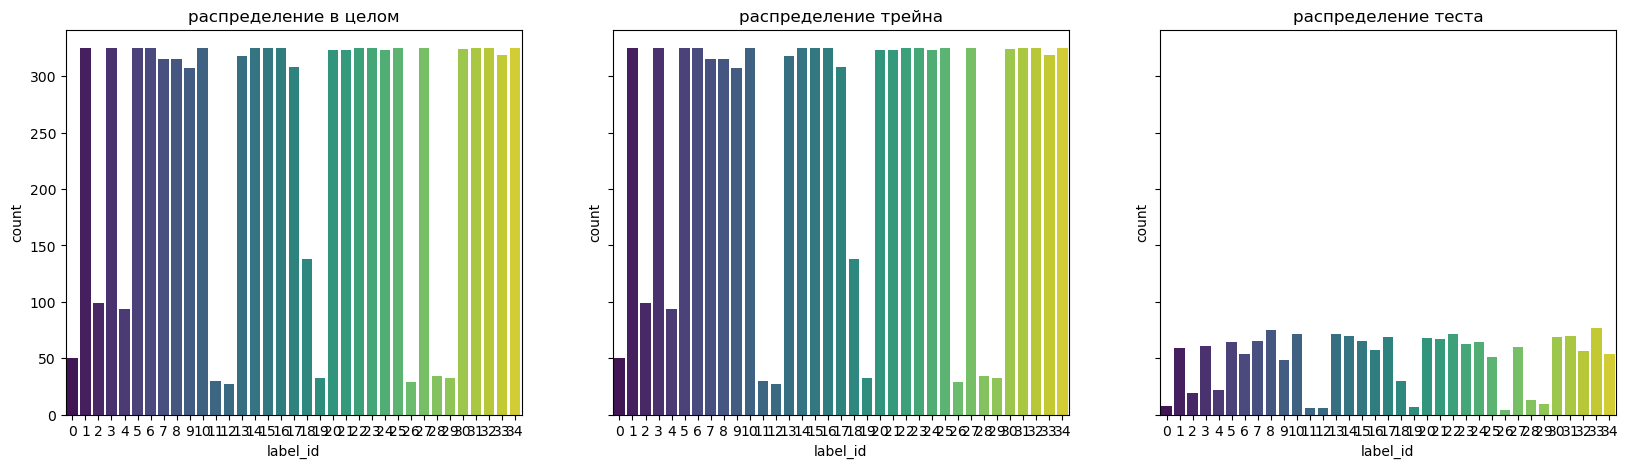

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
# plt.figure(figsize=(12,6))
sns.countplot(data = df,x = 'label_id', palette='viridis', ax = axes[0])
axes[0].set_title('распределение в целом')
sns.countplot(data = train_table,x = 'label_id', palette='viridis', ax = axes[1])
axes[1].set_title('распределение трейна')
sns.countplot(data = test_table,x = 'label_id', palette='viridis', ax = axes[2])
axes[2].set_title('распределение теста')
plt.show()

In [8]:
label_counts = train_table['label_id'].value_counts()
label_counts = label_counts.to_frame()
label_counts.index.name = None
label_counts = label_counts.reset_index()
label_counts = label_counts.rename(columns={'index':'label'})
# label_counts

In [9]:
ok_lables = label_counts.loc[label_counts['count']>200,'label']
ok_lables = ok_lables.values
ok_lables

array([ 6, 15, 23, 27,  5, 32, 10, 34,  3, 25, 14, 22, 31, 16,  1, 30, 20,
       24, 21, 33, 13,  8,  7, 17,  9], dtype=int64)

In [10]:
mean_count = round(np.mean(label_counts.loc[label_counts['count']>200,'count'].values))
mean_count

322

In [12]:
bad_lables = label_counts.loc[label_counts['count']<200,'label'].values
bad_lables

array([18,  2,  4,  0, 28, 19, 29, 11, 26, 12], dtype=int64)

In [13]:
train_table_g = train_table[train_table['label_id'].isin(ok_lables)]
train_table_g

image_name  label_id
0      8d705100db3148659fdbb1c6899e48c6.jpg         6
1     34a7de32000b424e801f08880c383dd4.webp         9
2      336026e3f2904e54b1cb06877f39a5a5.jpg        16
3      ab71336e97584b09b2da208a2c3e9b24.jpg        21
4      5298888bf29f476d951fac6fde8a941c.jpg        16
...                                     ...       ...
8609   c7313c2988634f5593373073193e1500.jpg        25
8610   7a51af7b391143418002fd288e6113b1.jpg        23
8611   66f57d8047844136b564b5de339aae09.jpg        21
8612   f455dcc345a245f4991dca7146a2b144.jpg        22
8614   10a1bde101f94b6ebdf18fad5bbd1863.jpg        30

[8050 rows x 2 columns]

In [14]:
for bad_l in bad_lables:
    sampled_table = train_table[train_table['label_id'] == bad_l].sample(n = mean_count,replace= True, random_state = 42).reset_index(drop = True)
    train_table_g = pd.concat([train_table_g,sampled_table],axis = 0,ignore_index=True)

In [15]:
train_table = train_table_g.copy()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

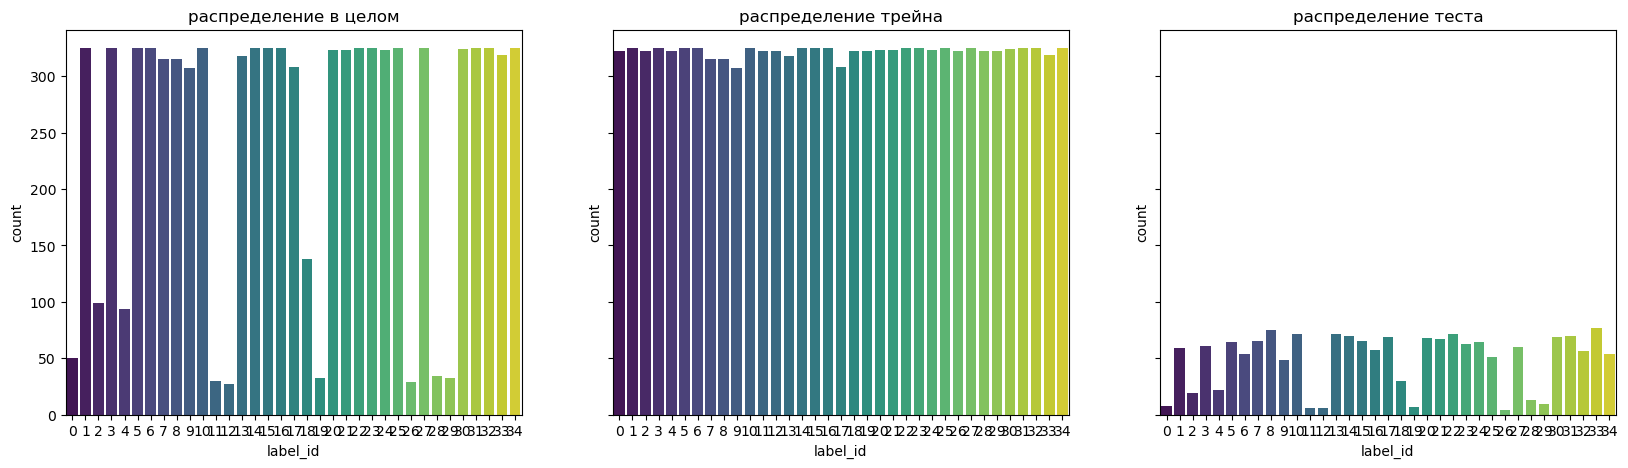

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
sns.countplot(data = df,x = 'label_id', palette='viridis', ax = axes[0])
axes[0].set_title('распределение в целом')
sns.countplot(data = train_table,x = 'label_id', palette='viridis', ax = axes[1])
axes[1].set_title('распределение трейна')
sns.countplot(data = test_table,x = 'label_id', palette='viridis', ax = axes[2])
axes[2].set_title('распределение теста')
plt.show()

In [ ]:
# train_lables = train_table['label_id'].values

In [ ]:
# from sklearn.utils import class_weight

In [ ]:
# class_weights = class_weight.compute_class_weight(class_weight='balanced',classes= np.unique(train_lables),y = train_lables)

In [ ]:
# class_weights_dict = dict(enumerate(class_weights))
# class_weights_dict

In [20]:
IMG_SIZE = 224
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./127.5, offset = -1)
    ])

In [21]:
full_size = (224,224,3)

In [22]:
def read_image(img_file):
    img_file = str(img_file.numpy(),encoding='utf-8')
    img = Image.open(os.path.join(imges_path,img_file)).convert('RGB')
    img = np.array(img)
    img = tf.constant(img,dtype=tf.float32)
    img = resize_and_rescale(img, training=True)
    return img

In [23]:
def load(x):
    img = tf.py_function(read_image, [x], [tf.float32])
    img = img[0]
    img = tf.ensure_shape(img,full_size)
    return(img)

In [24]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomContrast(0.4),
  layers.RandomBrightness(0.4, value_range=(0, 1)),
])

In [30]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE
def create_tf_dataset(df, Train = True):
    file_paths = df['image_name'].values
    # labels = df['label_id'].values
    labels = df['label_id'].values
    labels = keras.utils.to_categorical(labels)
    data_set = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    data_set = data_set.map(lambda x, y: (load(x), y), num_parallel_calls=AUTOTUNE)
    print('images readed')
    data_set = data_set.shuffle(11270)
    data_set = data_set.batch(batch_size)
    
    if Train:
        data_set = data_set.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    data_set = data_set.prefetch(buffer_size=AUTOTUNE)
    return data_set

In [31]:
def create_test_dataset(df):
    file_paths = df['image_name'].values
    labels = df['label_id'].values
    labels = keras.utils.to_categorical(labels)
    data_set = tf.data.Dataset.from_tensor_slices(file_paths)
    data_set = data_set.map(lambda x: load(x), num_parallel_calls=AUTOTUNE)
    data_set = data_set.batch(1)
    data_set = data_set.prefetch(buffer_size=AUTOTUNE)
    return data_set

In [32]:
train_ds = create_tf_dataset(train_table)

images readed


In [33]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 35), dtype=tf.float64, name=None))>

In [34]:
val_ds = create_tf_dataset(test_table, Train = False)

images readed


In [35]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 35), dtype=tf.float64, name=None))>

In [36]:
def visualize_ds(ds: tf.data.Dataset,rows: int,coloumns: int, class_mapping: dict = None):
    '''
    visualize elements of ds with lables
    '''
    fig = plt.figure(figsize=(10,10),facecolor = (0.4, 0.5, 0.4))
    i = 0
    for item in ds.unbatch().take(rows*coloumns):
        image = item[0].numpy()
        label = np.argmax(item[1].numpy())
        if class_mapping != None:
            label = class_mapping[label]
        # print(label)
        fig.add_subplot(rows,coloumns,i+1)
        plt.imshow(image)
        plt.axis('off')
        x_text = image.shape[1]/2
        y_text = image.shape[0]*0.9
        plt.text(x_text, y_text,label, size=7,
                ha="center", va="center",
                bbox=dict(boxstyle="round",
                   ec=(0, 0, 0),
                   fc=(1, 1, 1, 0.8),
                   )
                )
        i+=1
    plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


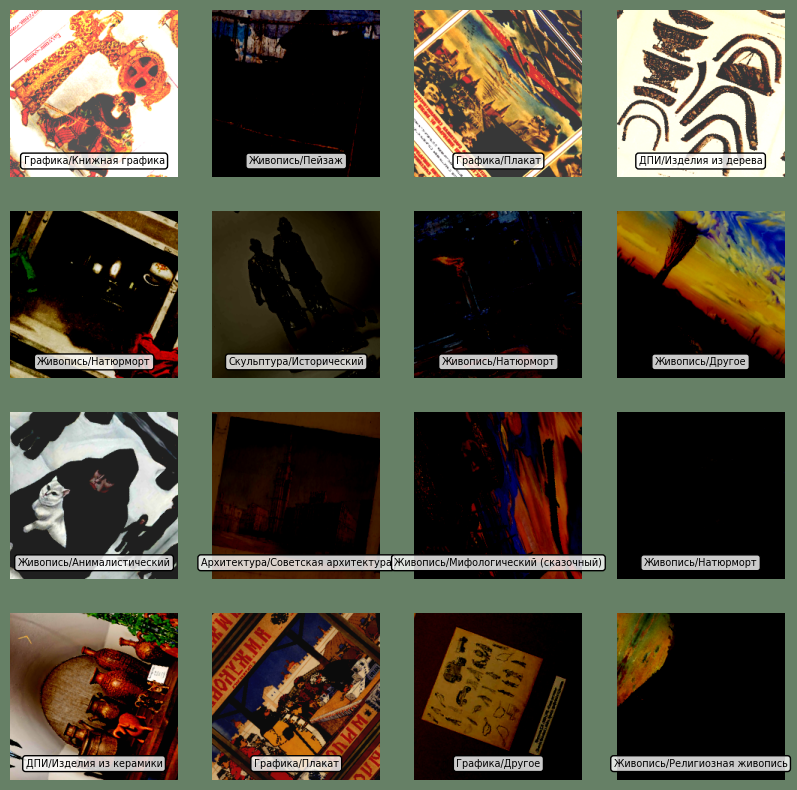

In [37]:
visualize_ds(train_ds,4,4,class_mapping)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

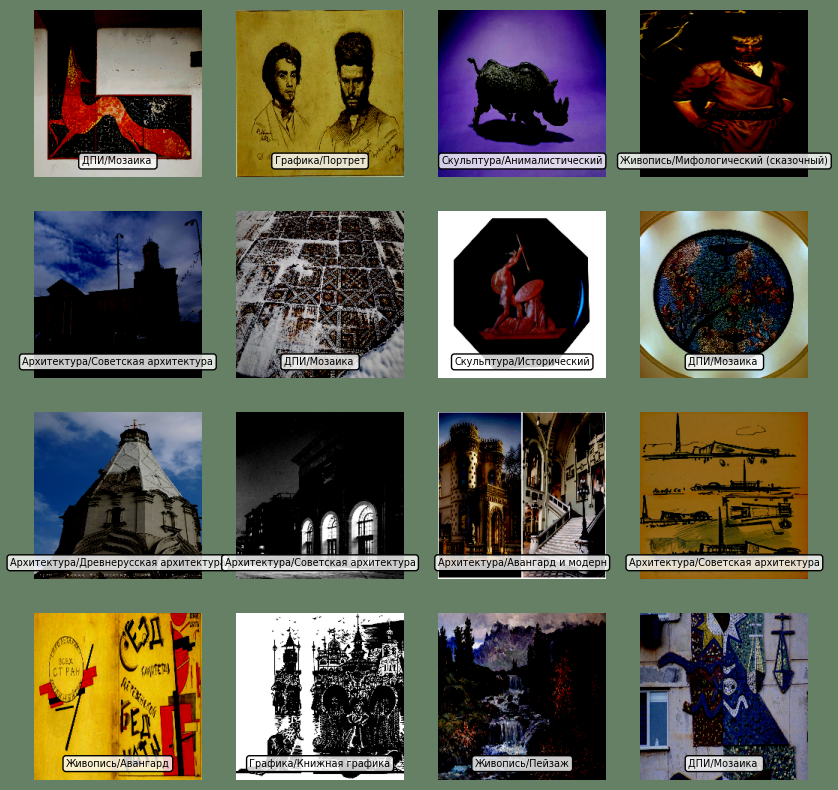

In [38]:
visualize_ds(val_ds,4,4,class_mapping)

In [ ]:
base_model = keras.applications.EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_shape=full_size,
    include_preprocessing= False
)

In [ ]:
# base_model.summary()

In [ ]:
base_model.trainable = False

In [ ]:
x = keras.layers.GlobalAveragePooling2D()(base_model.output) #idea порробовать макспулинг
x = keras.layers.Dropout(0.3)(x)  
outputs = keras.layers.Dense(11, activation='softmax')(x)
resnet_model = keras.Model(base_model.input,outputs)

In [ ]:
checkpoint_path_1 = "ef_net_s_1/P-{epoch:03d}.keras"
cp_callback_1 = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_1,
    save_best_only= True,
    monitor= 'val_accuracy',
    mode = 'max',
    verbose=1, 
    save_freq="epoch")

In [41]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                              patience=5, min_lr=0.001/100000,verbose=0)

In [42]:
lr = 0.0001

In [ ]:
resnet_model.compile(
    optimizer=keras.optimizers.Adam(lr*2),
    loss='categorical_crossentropy',
    metrics=['accuracy',tf.keras.metrics.F1Score(threshold=0.5)],
)

In [ ]:
epochs = 20
history = resnet_model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[cp_callback_1, reduce_lr]) 

Epoch 1/20


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1439 - f1_score: 0.0000e+00 - loss: 2.3884
Epoch 1: val_accuracy improved from -inf to 0.26007, saving model to ef_net_s_1/P-001.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - accuracy: 0.1443 - f1_score: 0.0000e+00 - loss: 2.3873 - val_accuracy: 0.2601 - val_f1_score: 0.0000e+00 - val_loss: 2.1661 - learning_rate: 2.0000e-04
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3156 - f1_score: 0.0048 - loss: 2.0543
Epoch 2: val_accuracy improved from 0.26007 to 0.42282, saving model to ef_net_s_1/P-002.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.3159 - f1_score: 0.0049 - loss: 2.0536 - val_accuracy: 0.4228 - val_f1_score: 0.0109 - val_loss: 1.9413 - learning_rate: 2.0000e-04
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4282 - f1_score: 0.0478 - loss: 1.8563
Epoch 3: val_accuracy improved from 0.42282 to 0.49497, saving model to ef_net_s_1/P-003.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 356s 3s/step

In [ ]:
score1 = resnet_model.evaluate(val_ds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6641 - f1_score: 0.4820 - loss: 1.0691


Зеленый - валидация, синий - обучение


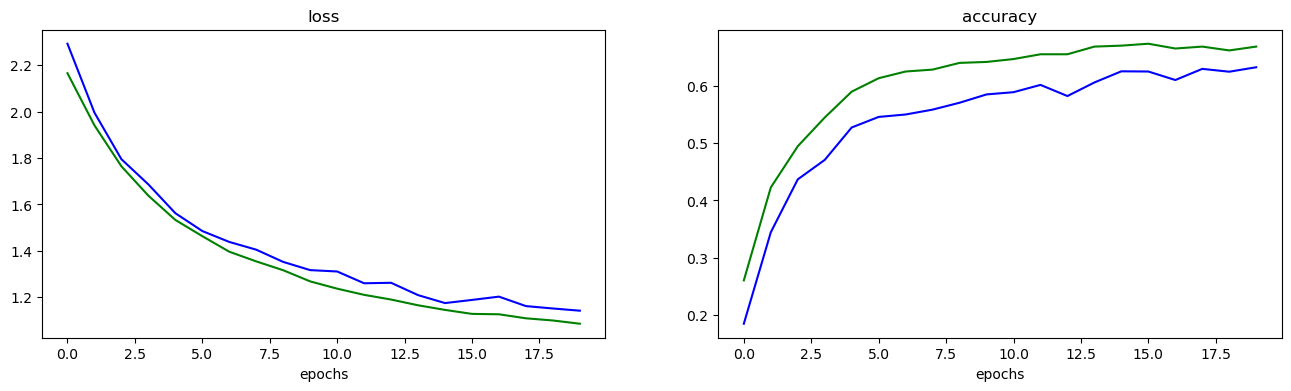

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"], 'g') 
ax.plot(history.history["loss"],'b')
ax.set_title("loss")
ax.set_xlabel("epochs")
ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"], 'g') 
ax2.plot(history.history["accuracy"],'b')
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
print('Зеленый - валидация, синий - обучение')
plt.show()

In [ ]:
base_model.trainable = True

In [45]:
resnet_loaded = keras.models.load_model(os.path.join('ef_net_s_0','cp_2-013.keras'))

In [44]:
resnet_loaded.evaluate(val_ds)

54/54 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.7494 - f1_score: 0.6335 - loss: 0.8062


[0.8725968599319458,
 0.7370864748954773,
 <tf.Tensor: shape=(35,), dtype=float32, numpy=
 array([0.6666666 , 0.6399999 , 0.19354834, 0.8709677 , 0.2941176 ,
        0.8091603 , 0.7222221 , 0.6071428 , 0.8671328 , 0.5333333 ,
        0.6896551 , 0.9090909 , 0.13333328, 0.58823526, 0.7619048 ,
        0.8992247 , 0.8224298 , 0.6271186 , 0.6969697 , 0.6666666 ,
        0.8617886 , 0.8188976 , 0.61682236, 0.8547008 , 0.93548375,
        0.6588235 , 0.1428571 , 0.7339449 , 0.        , 0.09999995,
        0.8405796 , 0.8695652 , 0.90598285, 0.65116274, 0.7521367 ],
       dtype=float32)>]

In [46]:
checkpoint_path_2 = "ef_net_s_0/cp3-{epoch:03d}.keras"
cp_callback_2 = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_2,
    save_best_only= True,
    monitor= 'val_accuracy',
    mode = 'max',
    verbose=1, 
    save_freq="epoch")

In [47]:
resnet_loaded.compile(
    optimizer=keras.optimizers.Adam(lr/5),
    loss='categorical_crossentropy',
    metrics=['accuracy',tf.keras.metrics.F1Score(threshold=0.5)],
)

In [48]:
epochs = 15
history_2 = resnet_loaded.fit(train_ds, epochs=epochs, validation_data=val_ds,callbacks=[cp_callback_2, reduce_lr])

Epoch 1/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.8070 - f1_score: 0.8097 - loss: 0.6559 
Epoch 1: val_accuracy improved from -inf to 0.78584, saving model to ef_net_s_0/cp3-001.keras
353/353 ━━━━━━━━━━━━━━━━━━━━ 7847s 21s/step - accuracy: 0.8070 - f1_score: 0.8097 - loss: 0.6558 - val_accuracy: 0.7858 - val_f1_score: 0.7472 - val_loss: 0.6466 - learning_rate: 2.0000e-05
Epoch 2/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.8443 - f1_score: 0.8400 - loss: 0.5064 
Epoch 2: val_accuracy improved from 0.78584 to 0.80209, saving model to ef_net_s_0/cp3-002.keras
353/353 ━━━━━━━━━━━━━━━━━━━━ 7967s 22s/step - accuracy: 0.8443 - f1_score: 0.8400 - loss: 0.5063 - val_accuracy: 0.8021 - val_f1_score: 0.7734 - val_loss: 0.5917 - learning_rate: 2.0000e-05
Epoch 3/15
246/353 ━━━━━━━━━━━━━━━━━━━━ 40:48 23s/step - accuracy: 0.8684 - f1_score: 0.8675 - loss: 0.4216

In [ ]:
#6

In [ ]:
resnet_loaded = keras.models.load_model(os.path.join('ef_net_s_0','cp_2-013.keras'))

In [ ]:
score2 = resnet_loaded.evaluate(val_ds)

54/54 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.7385 - f1_score: 0.6463 - loss: 0.8568


In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(131)
ax.plot(history_2.history["val_loss"], 'g') 
ax.plot(history_2.history["loss"],'b')
ax.set_title("loss")
ax.set_xlabel("epochs")
ax2 = fig.add_subplot(132)
ax2.plot(history_2.history["val_accuracy"], 'g') 
ax2.plot(history_2.history["accuracy"],'b')
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
ax3 = fig.add_subplot(133)
ax3.plot(history_2.history["val_f1_score"], 'g') 
ax3.plot(history_2.history["f1_score"],'b')
ax3.set_title("f1_score")
ax3.set_xlabel("epochs")
print('Зеленый - валидация, синий - обучение')
plt.show()

In [ ]:
def create_tf_dataset_(df, train = True):
    file_paths = df['image_name'].values
    labels = df['label_id'].values
    labels = keras.utils.to_categorical(labels)
    data_set = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    data_set = data_set.map(lambda x, y: (load(x), y), num_parallel_calls=AUTOTUNE)
    print('images readed')
    if train:
        data_set = data_set.shuffle(6900)
        data_set = data_set.batch(batch_size)
        data_set = data_set.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    else:
        data_set = data_set.batch(1)
    data_set = data_set.prefetch(buffer_size=AUTOTUNE)
    return data_set

In [ ]:
test_ds = create_tf_dataset_(test_table, train = False)

images readed


In [ ]:
true_lables = []
for elem in test_ds.as_numpy_iterator():
    true_lables.append(np.argmax(elem[1][0]))

In [ ]:
true_lables[:10]

[8, 21, 34, 23, 10, 3, 1, 7, 16, 24]

In [ ]:
test_table.head(10)

image_name  label_id
6892  ab679e13e8954ea2abcce879939b260f.jpg         8
6893  721aa0aac39c4b84a032a2369ae66698.jpg        21
6894  3d8a839e79d74ce7a1a56e1e6499abb2.jpg        34
6895  0e85eb2b529944df8b2fbe3c40e6ce80.jpg        23
6896  d5394c50e835491ab36c5f83f17d1bb1.jpg        10
6897  8ca03acc2fb54343904d5035af2ac4f7.jpg         3
6898  3dee298157a04cf2bf72ca483db7310f.jpg         1
6899  f969047a4cf84d27a792e2021b59e0cc.jpg         7
6900  f692e5639b5944de8d92238f857ba587.jpg        16
6901  7ec11932ae7347afa90a6bf60bb53c6b.jpg        24

In [ ]:
preds_1_ = resnet_loaded.predict(test_ds)

1723/1723 ━━━━━━━━━━━━━━━━━━━━ 330s 187ms/step


In [ ]:
preds_1 = []
for i in range(len(preds_1_)):
    preds_1.append(np.argmax(preds_1_[i]))

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print('F1 для первой модели: {}'.format(f1_score(true_lables, preds_1, average='macro')))
print('Точность для первой модели: {}'.format(accuracy_score(true_lables,preds_1)))

F1 для первой модели: 0.6485633884381499
Точность для первой модели: 0.7376668601276842


In [ ]:
def visualize_val_ds(ds: tf.data.Dataset,preds: list, rows: int,coloumns: int, class_mapping: dict = None):
    '''
    visualize elements of ds with lables
    '''
    # fig = plt.figure(figsize=(10,10),facecolor = (0.4, 0.5, 0.4))
    fig = plt.figure(figsize=(15,15),facecolor = (0.12, 0.12, 0.12))
    rnd = random.randint(0,len(preds)-rows*coloumns)
    i = 0
    j = rnd
    for item in ds.unbatch().skip(rnd).take(rows*coloumns):
        image = item[0].numpy()
        image = (image+1)/2
        #todo сделать так, чтобы при разных предах были разные лейблы, а при одинаковых -один + рандом 
        #color1 DONE
        label = np.argmax(item[1].numpy())
        label_pred = preds[j]
        if class_mapping != None:
            label = class_mapping[label]
            label_pred = class_mapping[label_pred]
        fig.add_subplot(rows,coloumns,i+1)
        plt.imshow(image)
        plt.axis('off')
        if label == label_pred:
            x_text = image.shape[1]/2
            y_text = image.shape[0]*0.8
            plt.text(x_text, y_text,label, size=9,
                    ha="center", va="center",
                    bbox=dict(boxstyle="round",
                    ec=(0, 0, 0),
                    fc=(0, 0.6, 0, 0.8),
                    )
                    )
        else:
            x_text = image.shape[1]/2
            y_text = image.shape[0]*0.8
            y_text_pred = image.shape[0]*0.9
            plt.text(x_text, y_text,label, size=9,
                    ha="center", va="center",
                    bbox=dict(boxstyle="round",
                    ec=(0, 0, 0),
                    fc=(0, 0.6, 0, 0.8),
                    )
                    )
            
            plt.text(x_text, y_text_pred,label_pred, size=9,
                    ha="center", va="center",
                    bbox=dict(boxstyle="round",
                    ec=(0, 0, 0),
                    fc=(0.6, 0, 0, 0.8),
                    )
                    )
        i+=1
        j+=1
    plt.show()

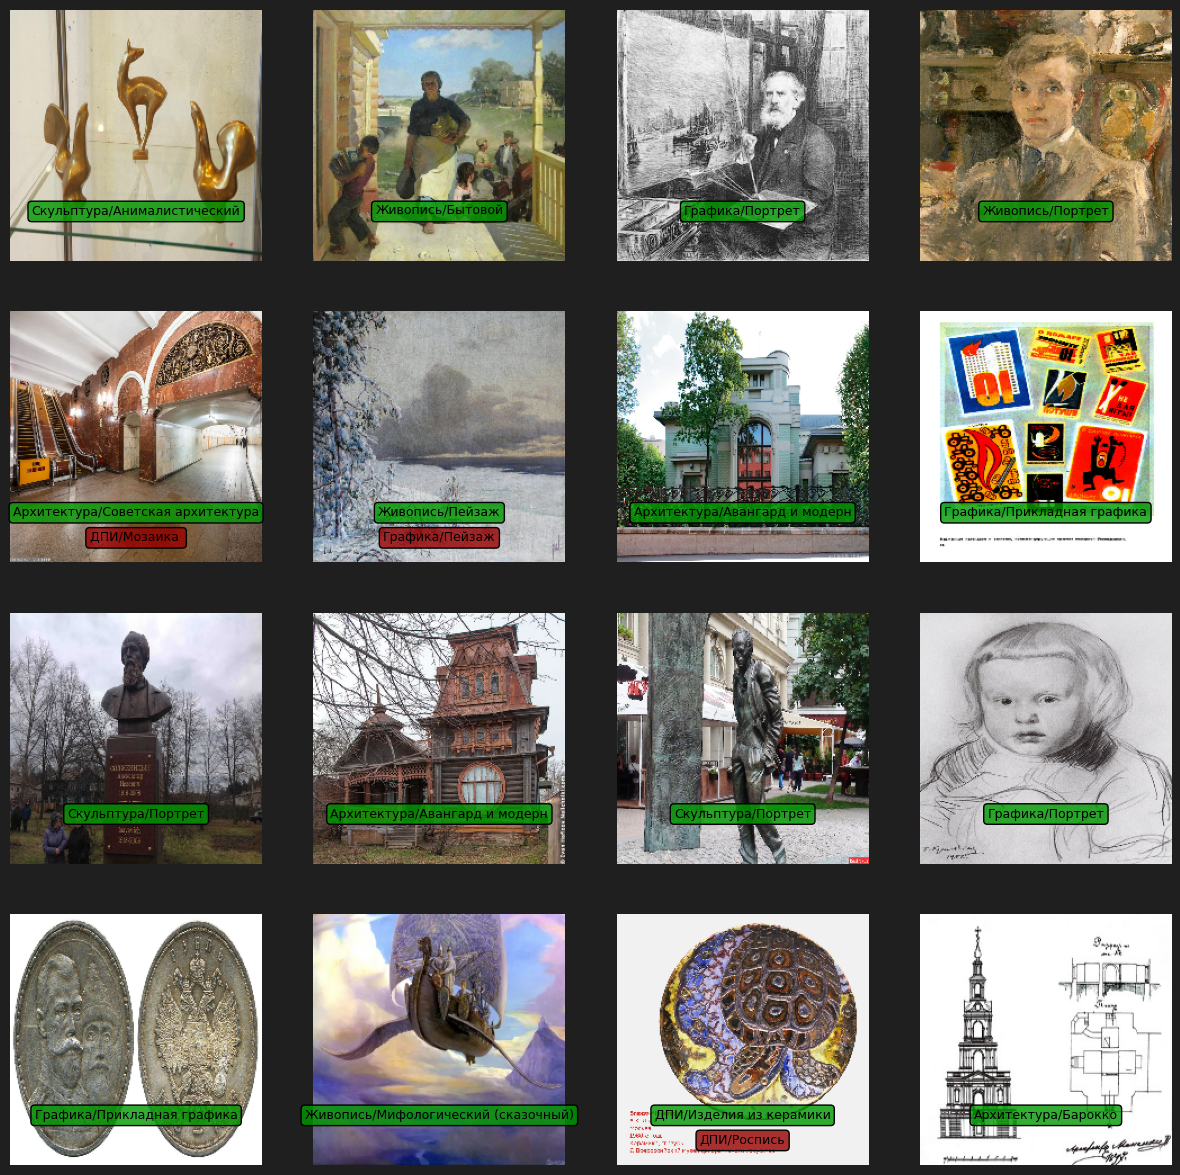

In [ ]:
visualize_val_ds(test_ds, preds_1,4,4,class_mapping)